In [2]:
import pandas as pd
import numpy as np
from sklearn. utils import resample # downsample the dataset 
from sklearn.model_selection import train_test_split # split data into training and testing sets 
from sklearn.preprocessing import scale # scale and center data 
from sklearn.svm import SVC # this will make a support vector machine for classificaiton 
from sklearn.model_selection import GridSearchCV # this will do cross validation from sklearn.metrics import confusion_matrix # this creates a confusion matrix 
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix from sklearn. decomposition import PCA # to perform PCA to plot the data

In [5]:
ada= pd.read_parquet("ada.parquet")

In [6]:
ada

,Date,Open,High,Low,Close,Volume,Return,Strategy,forecast
Date,,,,,,,,,
2022-03-15 12:00:00,1647345600000000000,0.7900,0.8090,0.7850,0.8000,21130172.3,0.012658,Buy,0.791510
2022-03-15 16:00:00,1647360000000000000,0.8000,0.8150,0.7970,0.8130,19668867.7,0.016250,Sell,0.801529
2022-03-15 20:00:00,1647374400000000000,0.8140,0.8170,0.7980,0.8000,17780666.2,-0.015990,Buy,0.814554
2022-03-16 00:00:00,1647388800000000000,0.8000,0.8340,0.7920,0.8010,44665071.8,0.001250,Buy,0.801529
2022-03-16 04:00:00,1647403200000000000,0.8000,0.8050,0.7930,0.8020,11815189.9,0.001248,Buy,0.802531
...,...,...,...,...,...,...,...,...,...
2022-06-22 08:00:00,1655884800000000000,0.4608,0.4773,0.4582,0.4724,31698779.1,0.025174,Sell,0.461681
2022-06-22 12:00:00,1655899200000000000,0.4725,0.4809,0.4656,0.4674,43132479.2,-0.010584,Buy,0.473303
2022-06-22 16:00:00,1655913600000000000,0.4674,0.4746,0.4626,0.4675,23988821.5,0.000214,Sell,0.468294


In [9]:
ada = pd.get_dummies(ada, columns=["Strategy"])

In [65]:
y = ada["Strategy_Buy"]
x = ada[["Open","High", "Low", "Close", "Volume", "Return", "forecast"]]

In [66]:
x_train, x_test, y_train, y_test =  train_test_split(x,y)

In [67]:
x_train_scaled = scale(x_train)
x_test_scaled = scale(x_test)

In [68]:
clf_svm  = SVC()
clf_svm.fit(x_train_scaled, y_train)

SVC()

c:\Users\kumar\OneDrive\Documents\Github\playground\playground\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


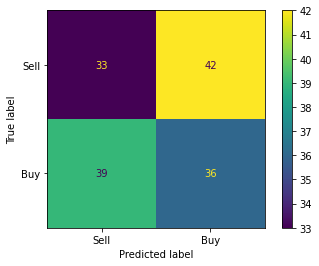

In [69]:
plot_confusion_matrix(clf_svm,x_test_scaled,y_test,display_labels=["Sell","Buy"])